In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pycbc.population.population_models import *
import scipy.interpolate as scipy_interpolate
from tqdm import tqdm

### 1. Merger rate density

In [4]:
redshift_range = np.linspace(0, 20, 1000)

# median R0 cases
R0_median_bbh = 22*10**(-9)  #  BBH median local merger rate (Mpc^-3 yr^-1)
R0_median_bns = 250*10**(-9)  #  BNS median local merger rate (Mpc^-3 yr^-1)
R0_median_nsbh = 170*10**(-9)  #  NSBH median local merger rate (Mpc^-3 yr^-1)

density_func_bbh_median = merger_rate_density(sfr_func=sfr_madau_dickinson_2014, td_model='inverse', rho_local=R0_median_bbh, z_array=redshift_range)
density_func_bns_median = merger_rate_density(sfr_func=sfr_madau_dickinson_2014, td_model='inverse', rho_local=R0_median_bns, z_array=redshift_range)
density_func_nsbh_median = merger_rate_density(sfr_func=sfr_madau_dickinson_2014, td_model='inverse', rho_local=R0_median_nsbh, z_array=redshift_range)

# upper R0 cases
R0_upper_bbh = 45*10**(-9)  #  BBH upper local merger rate (Mpc^-3 yr^-1)
R0_upper_bns = 1900*10**(-9)  #  BNS upper local merger rate (Mpc^-3 yr^-1)
R0_upper_nsbh = 320*10**(-9)  #  NSBH upper local merger rate (Mpc^-3 yr^-1)

density_func_bbh_upper = merger_rate_density(sfr_func=sfr_madau_dickinson_2014, td_model='inverse', rho_local=R0_upper_bbh, z_array=redshift_range)
density_func_bns_upper = merger_rate_density(sfr_func=sfr_madau_dickinson_2014, td_model='inverse', rho_local=R0_upper_bns, z_array=redshift_range)
density_func_nsbh_upper = merger_rate_density(sfr_func=sfr_madau_dickinson_2014, td_model='inverse', rho_local=R0_upper_nsbh, z_array=redshift_range)


### 2. Cumulative merger rate

In [5]:
# median R0 cases
rate_list_bbh_median = []
merger_rate_bbh_median = coalescence_rate(rate_den=density_func_bbh_median, z_array=redshift_range)
rate_list_bns_median = []
merger_rate_bns_median = coalescence_rate(rate_den=density_func_bns_median, z_array=redshift_range)
rate_list_nsbh_median = []
merger_rate_nsbh_median = coalescence_rate(rate_den=density_func_nsbh_median, z_array=redshift_range)

for redshift in tqdm(redshift_range):
    rate_z = total_rate_upto_redshift(redshift, merger_rate_bbh_median)
    rate_list_bbh_median.append(rate_z)
cumulative_rate_func_bbh_median = scipy_interpolate.interp1d(
    redshift_range, rate_list_bbh_median, fill_value='extrapolate')

for redshift in tqdm(redshift_range):
    rate_z = total_rate_upto_redshift(redshift, merger_rate_bns_median)
    rate_list_bns_median.append(rate_z)
cumulative_rate_func_bns_median = scipy_interpolate.interp1d(
    redshift_range, rate_list_bns_median, fill_value='extrapolate')

for redshift in tqdm(redshift_range):
    rate_z = total_rate_upto_redshift(redshift, merger_rate_nsbh_median)
    rate_list_nsbh_median.append(rate_z)
cumulative_rate_func_nsbh_median = scipy_interpolate.interp1d(
    redshift_range, rate_list_nsbh_median, fill_value='extrapolate')

# upper R0 cases
rate_list_bbh_upper = []
merger_rate_bbh_upper = coalescence_rate(rate_den=density_func_bbh_upper, z_array=redshift_range)
rate_list_bns_upper = []
merger_rate_bns_upper = coalescence_rate(rate_den=density_func_bns_upper, z_array=redshift_range)
rate_list_nsbh_upper = []
merger_rate_nsbh_upper = coalescence_rate(rate_den=density_func_nsbh_upper, z_array=redshift_range)

for redshift in tqdm(redshift_range):
    rate_z = total_rate_upto_redshift(redshift, merger_rate_bbh_upper)
    rate_list_bbh_upper.append(rate_z)
cumulative_rate_func_bbh_upper = scipy_interpolate.interp1d(
    redshift_range, rate_list_bbh_upper, fill_value='extrapolate')

for redshift in tqdm(redshift_range):
    rate_z = total_rate_upto_redshift(redshift, merger_rate_bns_upper)
    rate_list_bns_upper.append(rate_z)
cumulative_rate_func_bns_upper = scipy_interpolate.interp1d(
    redshift_range, rate_list_bns_upper, fill_value='extrapolate')

for redshift in tqdm(redshift_range):
    rate_z = total_rate_upto_redshift(redshift, merger_rate_nsbh_upper)
    rate_list_nsbh_upper.append(rate_z)
cumulative_rate_func_nsbh_upper = scipy_interpolate.interp1d(
    redshift_range, rate_list_nsbh_upper, fill_value='extrapolate')


100%|██████████| 1000/1000 [00:01<00:00, 704.79it/s]


### 3. plot

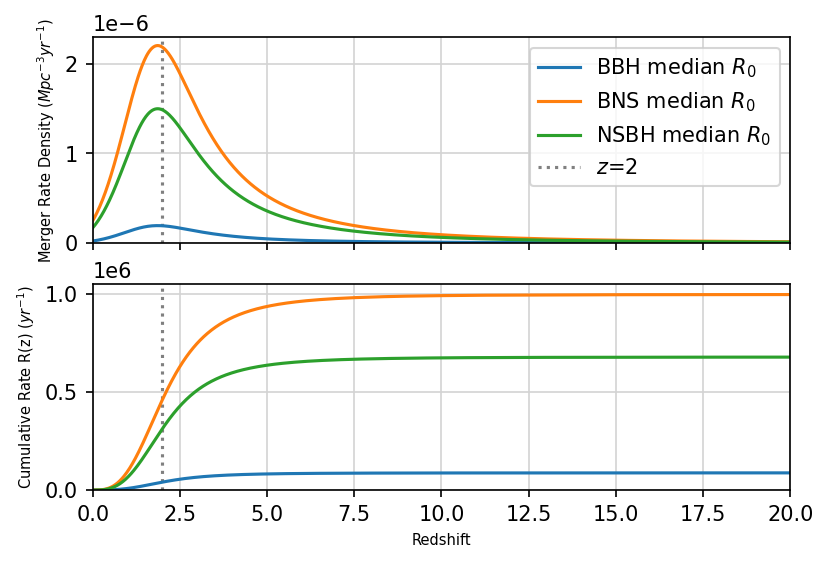

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=150, sharex=True)
ax1.vlines(x=2, ymin=0, ymax=1.7*10**(-5), colors='gray', linestyle='dotted', label=r"$z$=2")
ax1.plot(redshift_range, density_func_bbh_median(redshift_range), linestyle='solid', label=r"BBH median $R_0$")
ax1.plot(redshift_range, density_func_bns_median(redshift_range), linestyle='solid', label=r"BNS median $R_0$")
ax1.plot(redshift_range, density_func_nsbh_median(redshift_range), linestyle='solid', label=r"NSBH median $R_0$")

ax2.vlines(x=2, ymin=0, ymax=1.05*10**(6), colors='gray', linestyle='dotted', label=r"$z$=2")
ax2.plot(redshift_range, rate_list_bbh_median, label=r"BBH median $R_0$")
ax2.plot(redshift_range, rate_list_bns_median, label=r"BNS median $R_0$")
ax2.plot(redshift_range, rate_list_nsbh_median, label=r"NSBH median $R_0$")

ax1.set_ylabel("Merger Rate Density ($\mathit{Mpc}^{-3} \mathit{yr}^{-1}$)", fontsize=7)
ax1.set_ylim(0, 0.23*10**(-5))
ax1.grid(which='both', color='lightgray')
ax1.legend()

ax2.set_xlim(0, 20)
ax2.set_ylim(0, 1.05*10**(6))
ax2.set_xlabel("Redshift", fontsize=7)
ax2.set_ylabel("Cumulative Rate R(z) ($\mathit{yr}^{-1}$)", fontsize=7)
plt.grid(which='both', color='lightgray')
plt.savefig('median_merger_rate.pdf', dpi=500)
plt.show()